# **Project Name**    - **Airline Passenger Referral Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Johnsi.C


# **Project Summary -**









The Project revolves arround predicting passenger will recommand a particular airline to their friends based on historical reviews. This predictions is vital for airlines aiming to enhance customer satisfaction, service quality, and ultimately increase positive referrals.

**Objectives**

Prediction Goal: Develop a machine learning model to predict passenger referrals.

Feature Identification: Identify key features influencing passenger recommendations.

Data preparation: Address missing values, duplicates, and irrelavent columns for a clean dataset.

Exploratory Data Analysis (EDA): Explore data patterns and distributions to gain insights.

Model Training and Evaluation: Utilize classification models and metrics to assess prediction accuracy.

**Main Libraries used:**

Pandas for data manipulation, aggregation

Matplotlib and Seaborn for visualization and behavior with respect to the target variable

NumPy for computationally efficient operations

Scikit Learn for model training, model optimization, and metrics calculation

Business Implications: Understanding passenger referral patterns can guide airlines in strategic decision making. Improving specific aspects like overall ratings, value for money, service quality may lead to positive recommendations, fostering customer loyalty and business growth.

**Steps in Project:**


1.   Clean the dataset, handling duplicates and missing values.
2.   Conduct EDA to uncover patterns and relationships in the data.
3.   Explore and select suitable machine learning models for prediction.
4.   Develop an evaluation strategy aligning with business goals.



# **GitHub Link -**

https://github.com/Johnsi-C/Airline-Passenger-Referral-Prediction

# **Problem Statement**


Data includes airline reviews from 2006 to 2019 for popular airlines around the world with multiple choice and free text questions. Data is scraped in Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [90]:
#Import the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# importing various machine learning models.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import lightgbm

# importing required classes for model selection.
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB



# importing model evaluation metrics.
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

# importing warnings library to avoid unnecessary warnings.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset from drive
airline_df = pd.read_excel('/content/drive/MyDrive/data_airline_reviews.xlsx')

### Dataset First View

In [4]:
# Dataset First Look
airline_df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
airline_df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
airline_df.shape

(131895, 17)

### Dataset Information

In [7]:
# Dataset Info
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
airline_df.duplicated().sum()

70711

In [9]:
#Removing Duplicates
airline_df.drop_duplicates(inplace=True)

In [10]:
#Now check Duplicate value count
airline_df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
airline_df.isnull().sum()

airline                1
overall             1783
author                 1
review_date            1
customer_review        1
aircraft           42696
traveller_type     23644
cabin               2479
route              23671
date_flown         23750
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [12]:
# Missing Values/Null Values Count
# function for finding Missing values :
def missing_values_check(df):
    percent_missing = airline_df.isnull().sum() * 100 / len(airline_df)
    missing_values_df = pd.DataFrame({'column_name': airline_df.columns,
                                     'percent_missing': percent_missing})
    return missing_values_df.sort_values('percent_missing',ascending=False)
# Percentage of missing values :
missing_values_check(airline_df)

,column_name,percent_missing
aircraft,aircraft,69.782950
ground_service,ground_service,39.250458
date_flown,date_flown,38.817338
route,route,38.688219
traveller_type,traveller_type,38.644090
entertainment,entertainment,34.247516
food_bev,food_bev,20.990782
seat_comfort,seat_comfort,8.127942
cabin_service,cabin_service,8.080544
cabin,cabin,4.051713


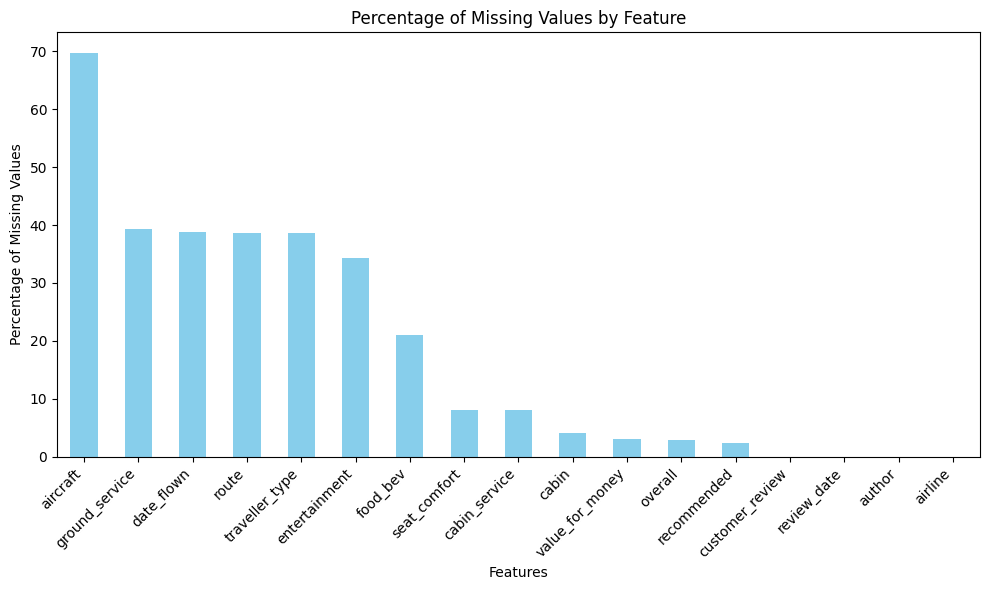

In [13]:
# Visualizing the missing values
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentage of missing values in each column
missing_percentage = airline_df.isnull().mean() * 100

# Sort columns by their missing percentage
missing_percentage = missing_percentage.sort_values(ascending=False)

# Plot the percentage of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [14]:
#Droping the aircraft column from data as it have highest null values.
airline_df = airline_df.drop(['aircraft'],axis = 1)

In [15]:
#droping the columns from data which are not for our use
airline_df = airline_df.drop(['author','review_date','route','date_flown','customer_review'],axis = 1)
airline_df.head()

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes
3,Turkish Airlines,2.0,Family Leisure,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no
5,Turkish Airlines,3.0,Business,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no
7,Turkish Airlines,10.0,Solo Leisure,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes


### What did you know about your dataset?

1. Our Dataset Contains 131895 Rows & 17 columns.
2. Data types of our features are float(numeric) & object(non-numeric).
3. It contains 70711 duplicated rows
4. Based on missing value analysis, it is clear that our dataset contains a large number of null values.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
airline_df.keys()

Index(['airline', 'overall', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [17]:
# Dataset Describe
airline_df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,59401.000000,56211.000000,56240.000000,48341.000000,40230.000000,37169.000000,59327.000000
mean,5.164863,2.959278,3.200231,2.926956,2.887994,2.681347,2.950849
std,3.483701,1.436467,1.568429,1.483122,1.504452,1.613995,1.588433
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Variables Description

**airline**: Name of the airline.

**overall**: Overall point is given to the trip between 1 to 10.

**author**: Author of the trip

**review date**: Date of the Review

**customer review**:Review of the customers in free text format

**aircraft**: Type of the aircraft

**traveller type**: Type of traveler (e.g. business, leisure)

**cabin**: Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service**: Rated between 1-5

**foodbev**: Rated between 1-5

**entertainment**: Rated between 1-5

**ground service**: Rated between 1-5

**value for money**: Rated between 1-5

**recommended**:Target variable, This column indicates whether the customer recommended the airline ('yes' or 'No')

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
# Iterate over each column and print unique values
airline_df.apply(lambda columns : columns.unique())
for i in airline_df.columns.tolist():
  print("No. of unique values in ", i, "is", airline_df[i].nunique(),".")


No. of unique values in  airline is 81 .
No. of unique values in  overall is 10 .
No. of unique values in  traveller_type is 4 .
No. of unique values in  cabin is 4 .
No. of unique values in  seat_comfort is 5 .
No. of unique values in  cabin_service is 5 .
No. of unique values in  food_bev is 5 .
No. of unique values in  entertainment is 5 .
No. of unique values in  ground_service is 5 .
No. of unique values in  value_for_money is 5 .
No. of unique values in  recommended is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [19]:
# Write your code to make your dataset analysis ready.

#converting targeted column
airline_df['recommended'].replace({'yes':1,'no':0},inplace=True)

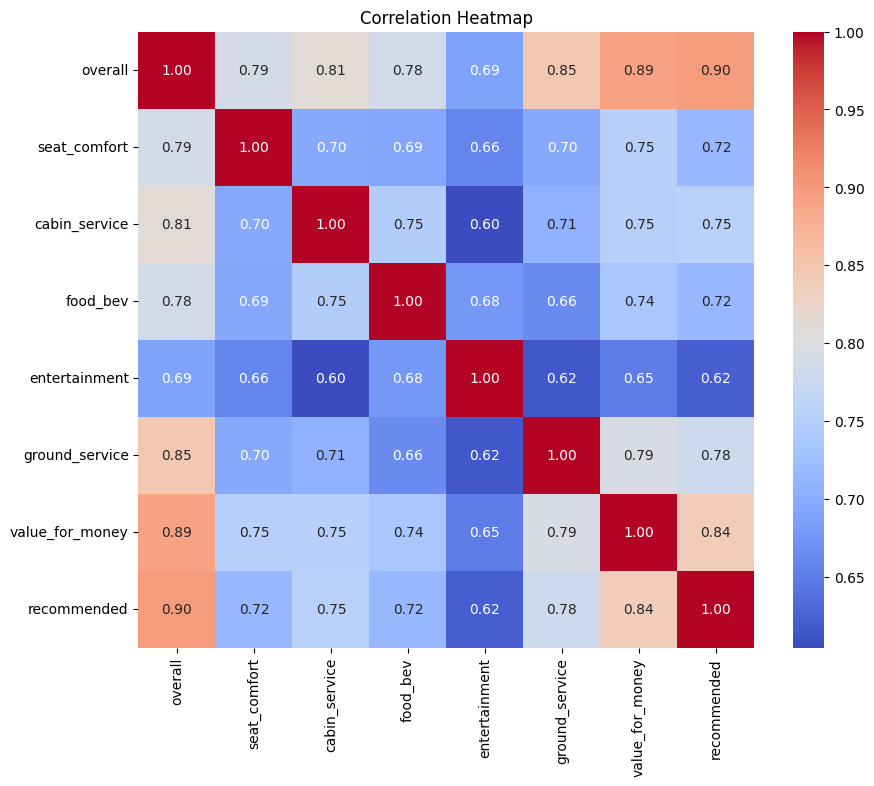

In [20]:
# Calculate correlation matrix
numeric_df = airline_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()


# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


### What all manipulations have you done and insights you found?

Dataset contains 70711 duplicated rows, we romoved the duplicated rows from the dataset using drop_duplicates method

Based on null value analysis, our dataset contains large number of null values. We Droped the aircraft column from data as it has highest null values and we droped the columns ['author','review_date','route','date_flown','customer_review'] from data which are not for our use.

Based on correlation matrix, The 'overall' column has high corration with 'recommended' column.

We Converted data type of  target column from categorical data into numerical data

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***



## **1.Which Traveller_type has more ratings?**

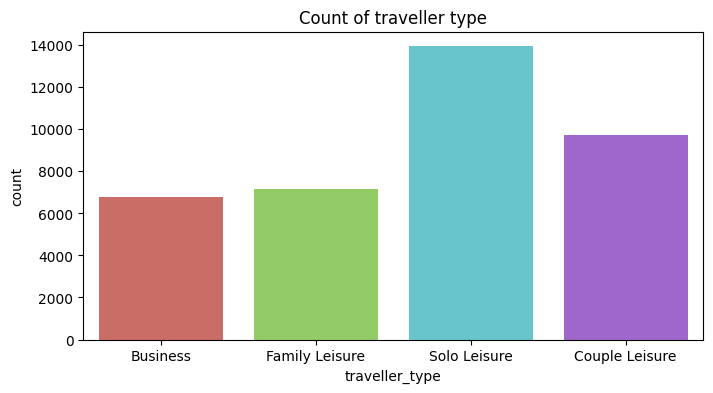

In [21]:
# Chart - 1 visualization code
#setting the figure size and plotting the graph
plt.figure(figsize=(8,4))
sns.countplot(data=airline_df, x='traveller_type',palette='hls')
plt.title('Count of traveller type')
plt.show()


##### 1. Why did you pick the specific chart?

Here i picked the countplot to visualize the frequeny or count of categorical data, it displays the number of occurences of each traveller_type.


##### 2. What is/are the insight(s) found from the chart?

Travelling type of Solo Leisure has more count

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help to create positive business impact

#### Chart - 2
## **2) Which type of Cabin has more recommendation?**

Text(0.5, 1.0, 'Count of Recommendation by Cabin Type')

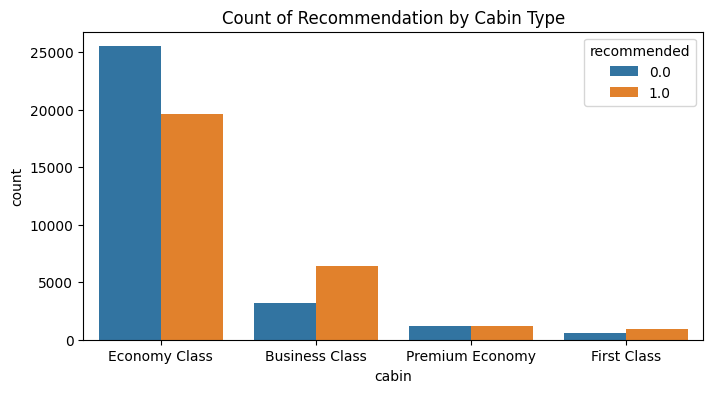

In [22]:
# Chart - 2 visualization code
#setting the figure size and plotting the graph
plt.figure(figsize=(8,4))
sns.countplot(data = airline_df, x='cabin', hue='recommended')
plt.title('Count of Recommendation by Cabin Type')

##### 1. Why did you pick the specific chart?

Here i picked the countplot to visualize the frequeny or count of categorical data, it displays the number of occurences of each cabin.

##### 2. What is/are the insight(s) found from the chart?

On the basis of graph -

Economy class has highest recommendation with bad reviews.

Business class has second most recommended cabin type with good reviews.

premium economy has equal reviews.

first class is least recommend cabin type with good reviews.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help to create positive business impact

#### Chart - 3

## **3) Is it Solo Leisure worth for Money?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

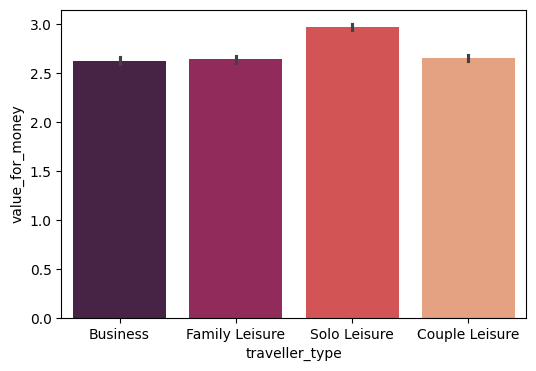

In [23]:
# Chart - 3 visualization code
#setting the figure size and plotting the grap
plt.figure(figsize=(6,4))
sns.barplot(x=airline_df['traveller_type'],y=airline_df['value_for_money'], palette ='rocket')

##### 1. Why did you pick the specific chart?

Here i picked the barplot to visualize the categorical variable

##### 2. What is/are the insight(s) found from the chart?

Travelling Type of Solo Leisure worth of Money compare to other type of travelling.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help to create positive business impact

#### Chart - 4
## **4) what is the average ratings of Food_bev and entertainment given by passenger over cabin?**

In [24]:
# Chart - 4 visualization code
#performing the grouphby method
eda_4=airline_df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda_4

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

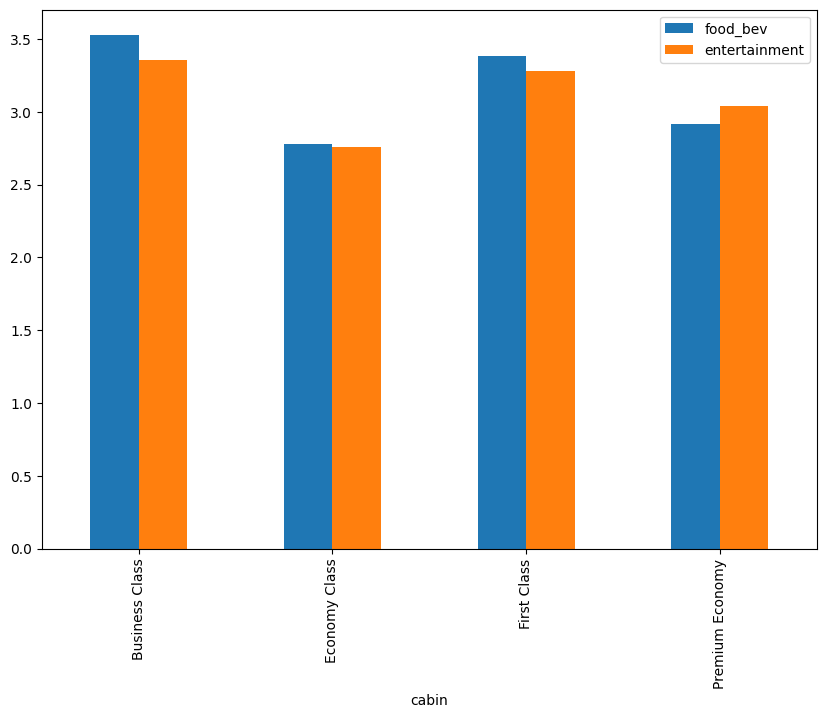

In [135]:
plt.rcParams['figure.figsize']=(10,7)
eda_4.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data.

##### 2. What is/are the insight(s) found from the chart?

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help to create positive business impact

#### Chart - 5
# **5) Top 10 airlines with most recommended?**


In [25]:
# Chart - 5 visualization code
recommended_count=airline_df.groupby('airline')['recommended'].sum().sort_values(ascending=False)
recommended_count


airline
China Southern Airlines    1454.0
British Airways            1141.0
Qatar Airways              1101.0
Lufthansa                   981.0
Emirates                    944.0
                            ...  
flydubai                     61.0
Adria Airways                42.0
Thai Smile Airways           30.0
Tunisair                     26.0
Air Arabia                   22.0
Name: recommended, Length: 81, dtype: float64

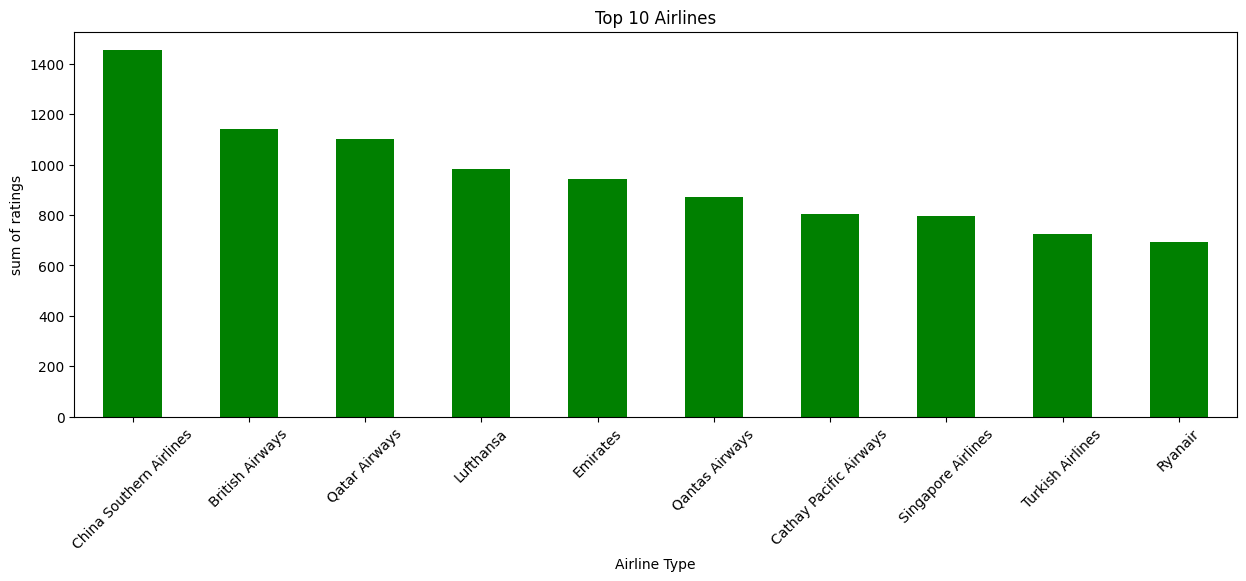

In [137]:
plt.figure(figsize=(15,5))
recommended_count[:10].plot(kind='bar',color='green')
plt.xlabel('Airline Type')
plt.ylabel('sum of ratings')
plt.title('Top 10 Airlines')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data.

##### 2. What is/are the insight(s) found from the chart?

China Southern Airline is most rated Airline

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, gained insights will help to create positive business impact

#### Chart - 6
## **6)Which airline made highest trips?**

In [26]:
# Chart - 6 visualization code
trip_by_airlines = airline_df['airline'].value_counts()
trip_by_airlines[:10]

airline
Spirit Airlines            2871
American Airlines          2846
United Airlines            2774
British Airways            2731
Emirates                   1763
China Southern Airlines    1719
Frontier Airlines          1622
Ryanair                    1550
Delta Air Lines            1535
Turkish Airlines           1478
Name: count, dtype: int64

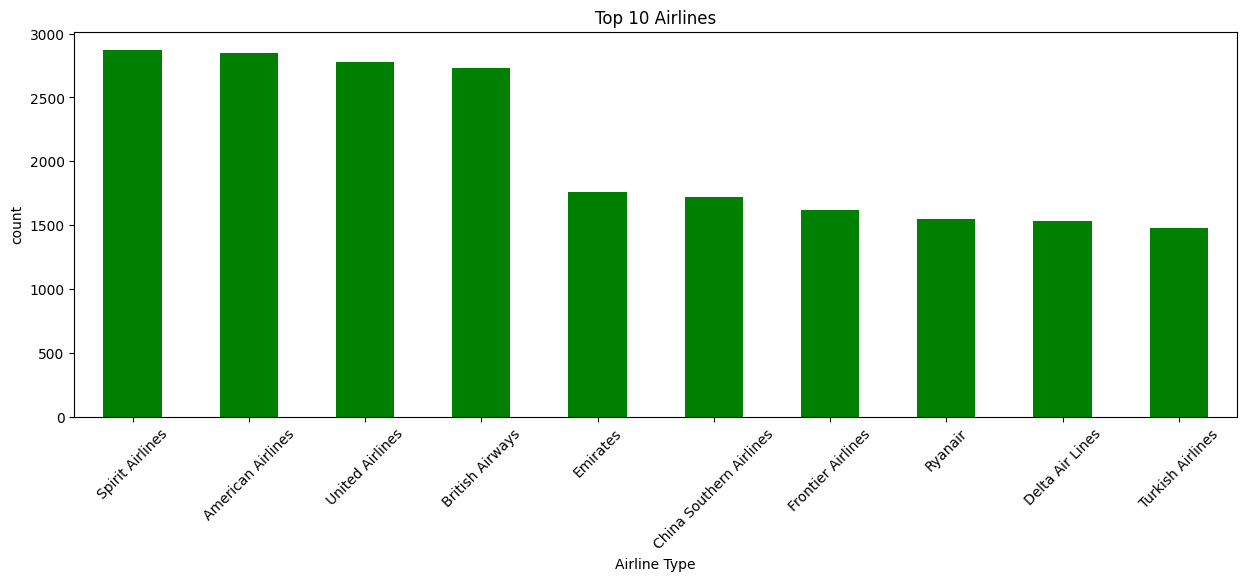

In [138]:
plt.figure(figsize=(15,5))
trip_by_airlines[:10].plot(kind='bar',color='green')
plt.xlabel('Airline Type')
plt.ylabel('count')
plt.title('Top 10 Airlines')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A barplot is basically used to aggregate the categorical data.

##### 2. What is/are the insight(s) found from the chart?

Spirit Airlines made a highest trip, next is American Airlines

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights will help to create positive business impact

#### Chart - 7
# **7) Comparison of all independent variable/features?**

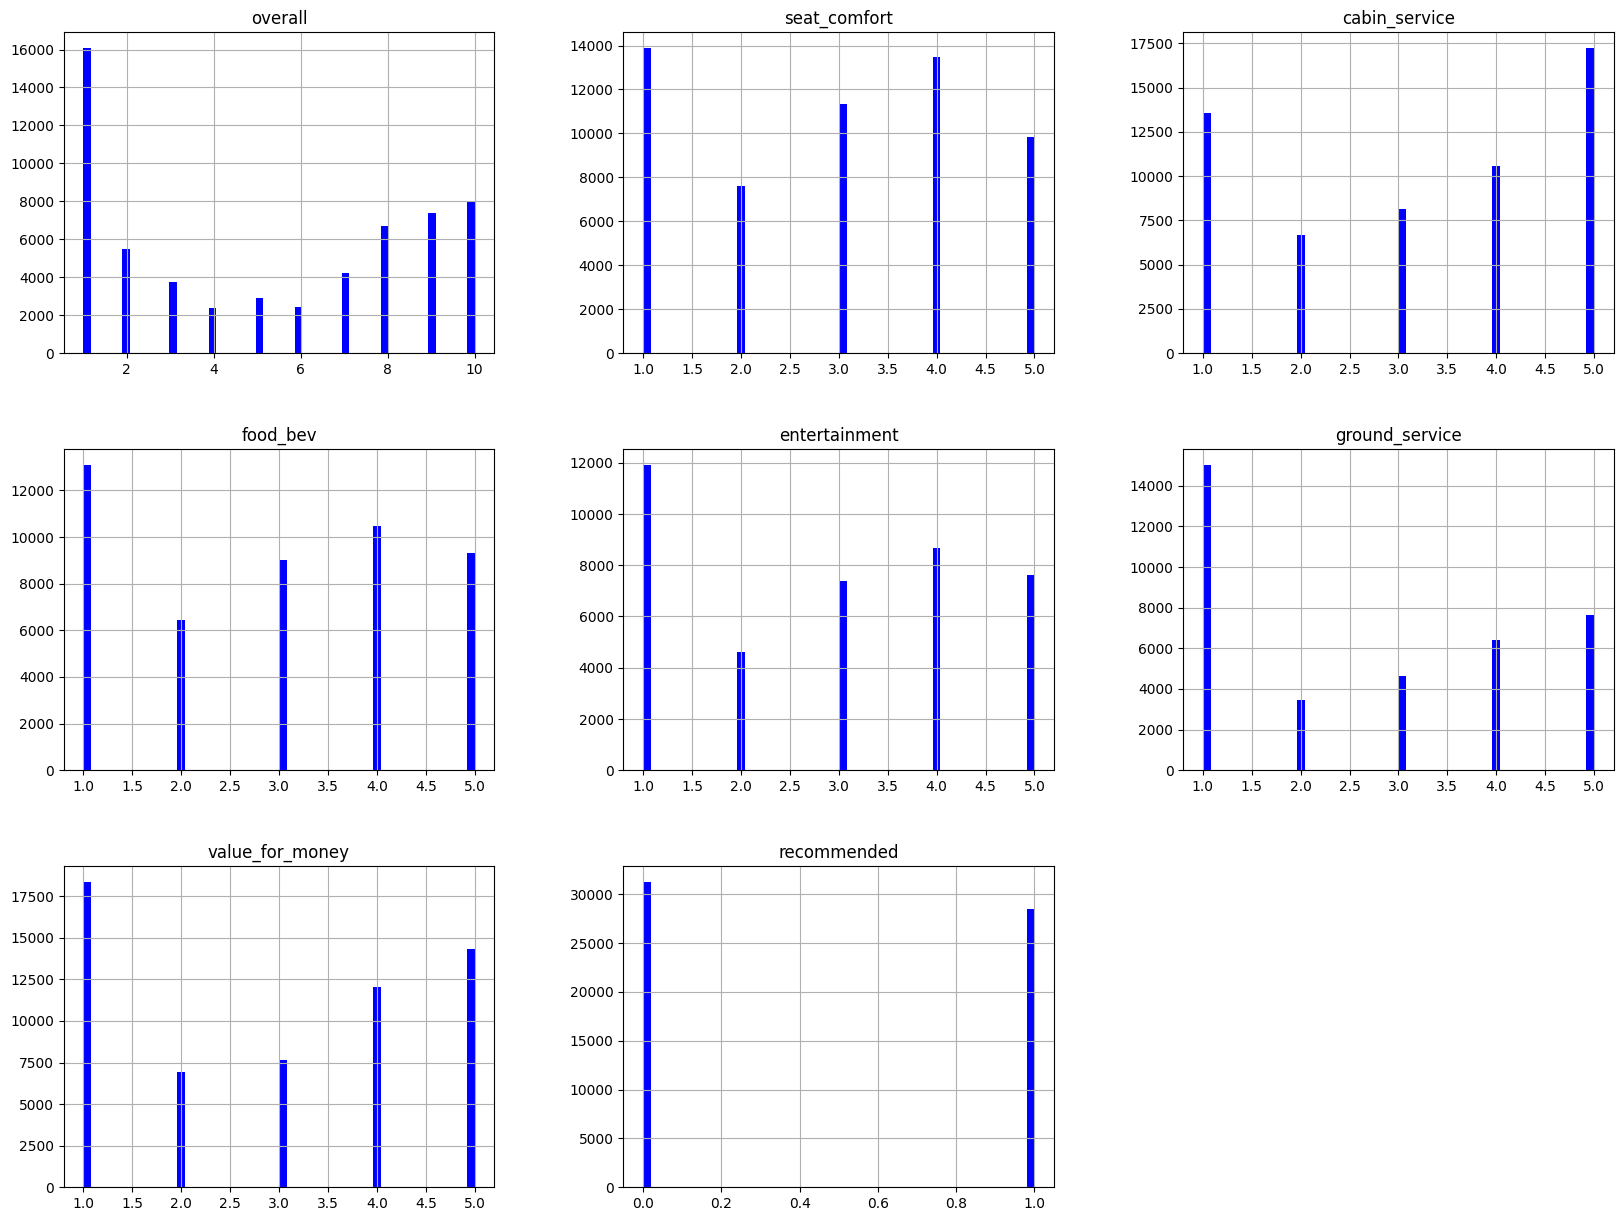

In [27]:
# Chart - 7 visualization code
#frequency distribution using histgram
airline_df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

##### 1. Why did you pick the specific chart?

Histogram plot helps to visualize the frequency of values.

##### 2. What is/are the insight(s) found from the chart?

From above plot

The overall feature ratings of 1 occur more frequently. From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

The food bev feature ratings of 1 is fist highest and 3,4 and 5 are varies equally.Which means their frequency are approximately equal.

The features of both the entertainment & ground service, We can say that ratings of 1 is first highest.

From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest.

From recommended we can say that most of the airline does not provide good service to passenger.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, gained insights will help to create positive business impact

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

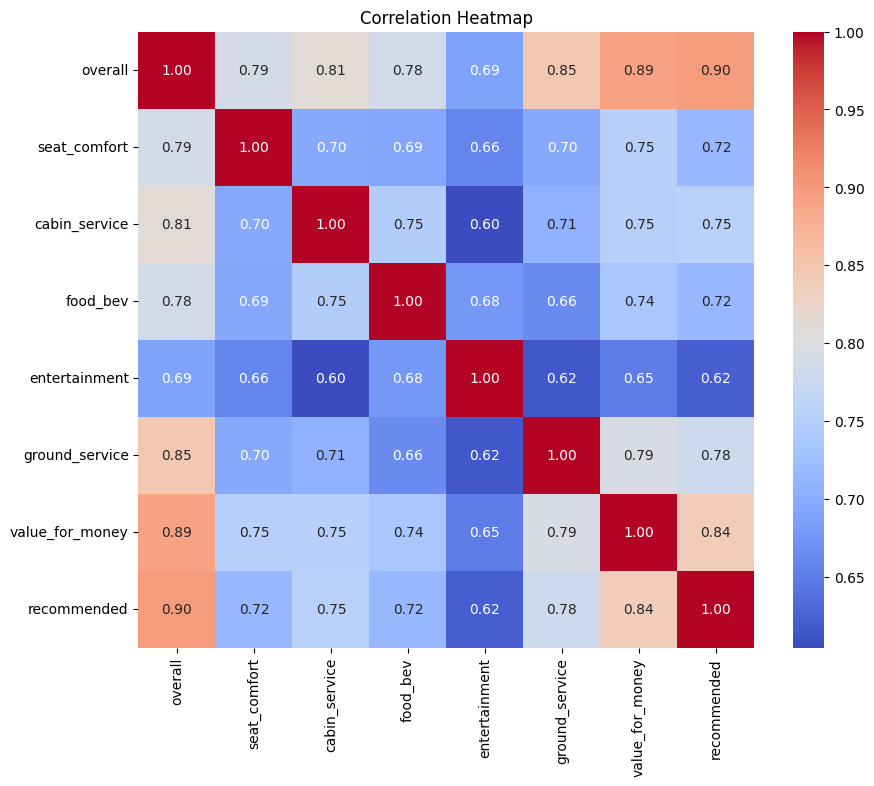

In [30]:
# Correlation Heatmap visualization code
numeric_df = airline_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Heatmaps are used to show relationships between two variables, By observing how cell colors change across each axis,

##### 2. What is/are the insight(s) found from the chart?

The 'overall' column has high corration with 'recommended' column.

#### Chart - 15 - Pair Plot

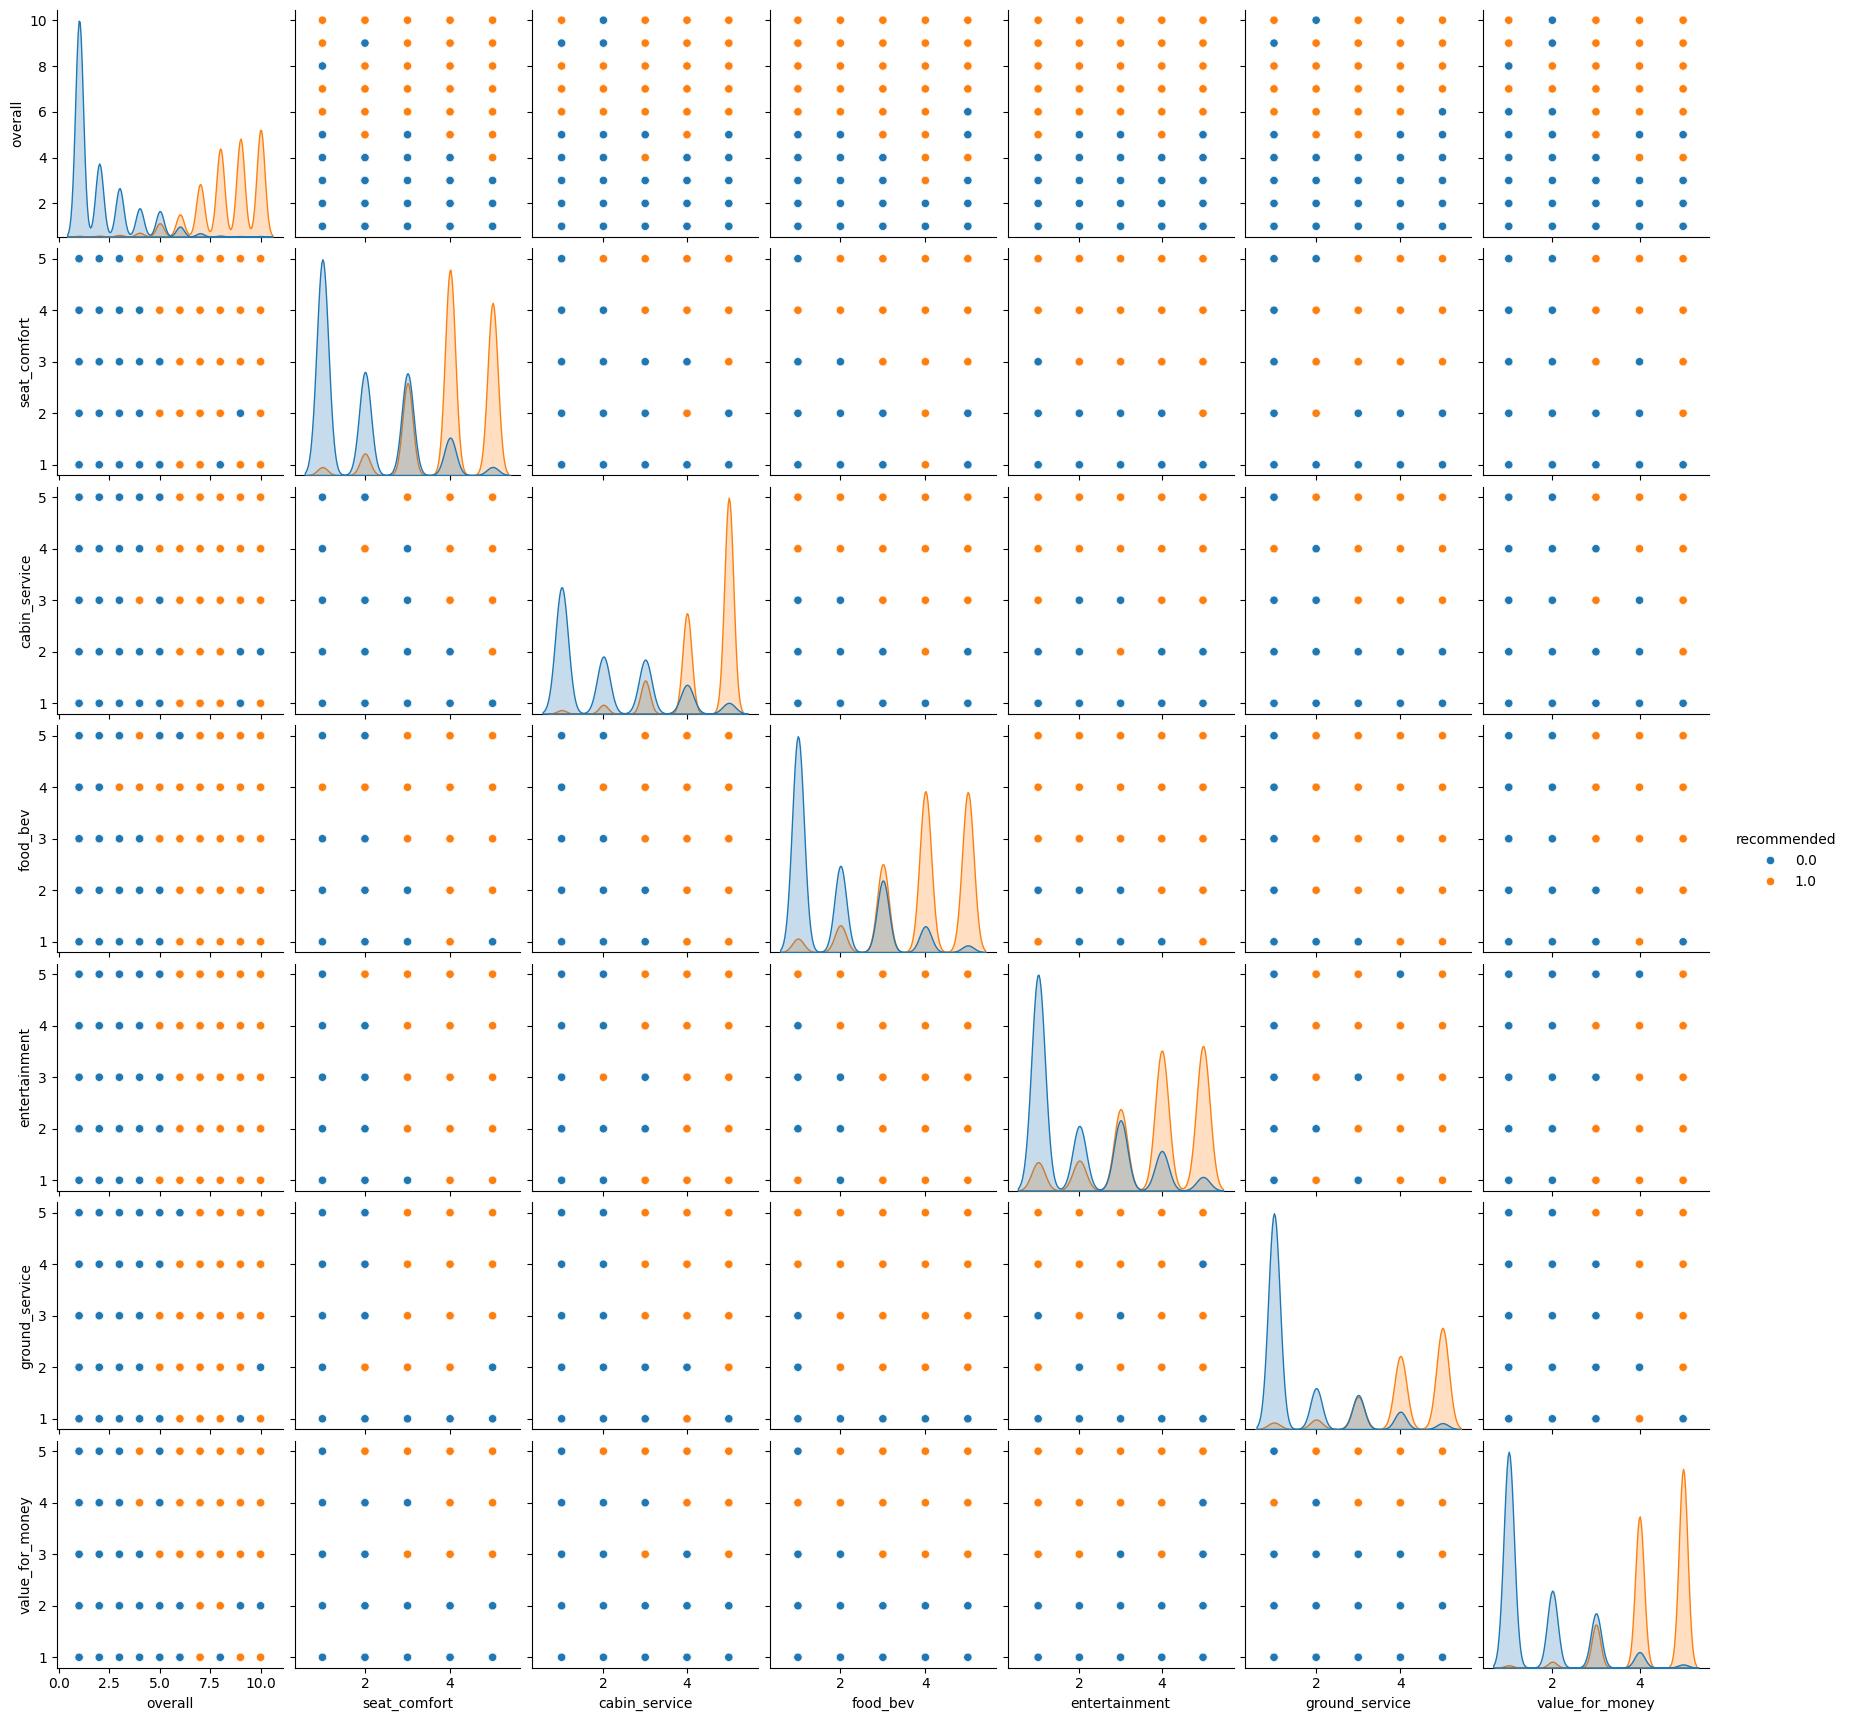

In [32]:
# Pair Plot visualization code
sns.pairplot(airline_df,hue='recommended')

##### 1. Why did you pick the specific chart?

Pair plot helps to plot multiple pairwise bivariate distributions in a dataset

##### 2. What is/are the insight(s) found from the chart?

In most plot blue dot (recommended 'No') is distributed more.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

*Answer* Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Based on chart experiment define null hypothesis is "average of overall rating is 5" define alternate as "average of overall rating is greater than 5"

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [45]:

import scipy.stats as stats

# Create a dummy dataset of 10 year old children's weight
data = airline_df['overall']

# Define the null hypothesis
H0 = "The average Rating of overall is 5."

# Define the alternative hypothesis
H1 = "The average rating of overall is more than 5."

# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(data, 5)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value)


# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Test statistic: 3.223717747518289
p-value: 0.001266059491951409
Reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

Here I used the t test to obtain P-Value

##### Why did you choose the specific statistical test?

t-test Calculation: stats.ttest_1samp(ratings, hypothesized_mean) computes the t-statistic and the p-value. The t-statistic measures how many standard deviations the sample mean is away from the hypothesized mean, and the p-value indicates the probability of obtaining a result at least as extreme as the one observed, under the null hypothesis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant relationship between overall rating & recommended column

#### 2. Perform an appropriate statistical test.

In [46]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm

# Sample data: Replace this with your actual data
# Let's assume we have two variables, X and Y
X = airline_df['overall']
Y = airline_df['recommended']

# Convert to pandas DataFrame for convenience
data = pd.DataFrame({'X': X, 'Y': Y})

# Add a constant (intercept) to the model
X = sm.add_constant(data['X'])

# Fit the linear regression model
model = sm.OLS(data['Y'], X).fit()

# Get the summary of the regression
summary = model.summary()
print(summary)

# Extract the p-value for the slope coefficient
p_value = model.pvalues[1]  # p-value for the X coefficient

# Define the significance level
alpha = 0.05

# Print results
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant linear relationship between X and Y.")
else:
    print("Fail to reject the null hypothesis: There is no significant linear relationship between X and Y.")


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 2.591e+05
Date:                Tue, 21 May 2024   Prob (F-statistic):               0.00
Time:                        15:34:35   Log-Likelihood:                 6722.6
No. Observations:               59761   AIC:                        -1.344e+04
Df Residuals:                   59759   BIC:                        -1.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1710      0.002   -110.340      0.0

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

On the basis of null value percentage we divide our data in two parts-

high_null = columns which have high percentage of null values.
low_null = columns which have low percentage of null values.

In [34]:
# Handling Missing Values & Missing Value Imputation
#Splitting the Numeric column
low_null = ['overall','seat_comfort','cabin_service','value_for_money']
high_null = ['food_bev','entertainment','ground_service']

In [35]:
#Imputation technique using Quantile-1 value
def impute_by_q1_values(df,column):
  Q1=np.percentile(np.sort(df[column].dropna()),25)
  df[column].fillna(Q1,inplace=True)

In [36]:
#Looping the null value column
for col in low_null:
  impute_by_q1_values(airline_df,col)

Imputed null values by Quantile-1 for the columns have low null value percentage.

In [37]:
#Imputation technique using Median Imputation
def median_imputation(df,column):
  df[column].fillna(df[column].median(),inplace=True)

In [38]:
#Looping the null value column
for col in high_null:
  median_imputation(airline_df,col)

Imputed null values by Median Imputaion for the columns have high percetage.

In [39]:
#after imputed null values
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,1.0,NaN,NaN,2.0,2.0,3.0,3.0,3.0,1.0,NaN


Now we are left with null values in traveller_type , cabin , recommeded column.

In [40]:
#Remove recommended null value row
airline_df.dropna(subset=['recommended'],inplace=True)

In [41]:
airline_df['traveller_type'].fillna(method="ffill",inplace=True)

In [42]:
airline_df['cabin'].fillna(airline_df['cabin'].mode().values[0],inplace=True)

Filling traveller_type column with Mode Imputation

cabin column with Forward fill method.

In [43]:
airline_df.head(1)

,airline,overall,traveller_type,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
1,Turkish Airlines,7.0,Business,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,1.0


In [44]:
#Checking the new null value percentage
missing_values_check(airline_df)

,column_name,percent_missing
airline,airline,0.0
overall,overall,0.0
traveller_type,traveller_type,0.0
cabin,cabin,0.0
seat_comfort,seat_comfort,0.0
cabin_service,cabin_service,0.0
food_bev,food_bev,0.0
entertainment,entertainment,0.0
ground_service,ground_service,0.0
value_for_money,value_for_money,0.0


In [84]:
airline_df.shape

(59761, 11)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Imputation techniques we uses here are Quantitle-1, Median imputaion, Mode imputation.

It is better to work with clean data for prediction rather than huge corrupt data.

### 2. Handling Outliers
Here no need to do Outlier handling

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

We already converted target value as categorical data into numerical data.

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation


In [ ]:
# Manipulate Features to minimize feature correlation and create new features

In [47]:
#separating the dependent and independent variables
y = airline_df['recommended']
x = airline_df.drop(columns = 'recommended')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting


##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

**One hot encoding**

In [48]:
# Transform Your data
x = pd.get_dummies(x)

In [54]:
x.shape

(59761, 96)

In [49]:
print("The Percentage of No labels of Target Variable is",np.round(y.value_counts()[0]/len(y)*100))
print("The Percentage of Yes labels of Target Variable is",np.round(y.value_counts()[1]/len(y)*100))

The Percentage of No labels of Target Variable is 52.0
The Percentage of Yes labels of Target Variable is 48.0


### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [55]:
#train and test split
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 42)

In [52]:
#shape of x_train and x_test data
print(x_train.shape)
print(x_test.shape)

(47808, 96)
(11953, 96)


In [53]:
#shape of y_train and y_test data
print(y_train.shape)
print(y_test.shape)

(47808,)
(11953,)


##### What data splitting ratio have you used and why?

Here I used a 80:20 train test ratio, A 80:20 is a common and widely accepted practice in the machine learning community. It provides a good starting point for model development and evaluation. A 80:20 ratio strikes a balance between having enough data for model training and having a substantial amount of data for robust model evaluation It helps in preventing overfitting, where the model performs well on the training data but fails to generalize to new, unseen data.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

The Percentage of both labels('yes','no) is approximately equal. So no need of Handling Class Imbalance technique.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 : Logistic Regression

In [56]:
# ML Model - 1 Implementation
#logistic regression fitting
log_reg = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
log_reg.fit(x_train, y_train)

# Predict on the model
log_reg.coef_

array([[ 1.01463332e+00,  1.63644755e-01,  3.09084572e-01,
         1.64079703e-01,  1.41950261e-01,  2.56456452e-01,
         8.02566566e-01,  1.17631812e-01,  6.58815009e-01,
         4.26764576e-01,  4.32402982e-02, -5.66297732e-02,
        -2.63048211e-01,  4.51316857e-01, -2.00380301e-02,
        -6.51412216e-01, -1.44241116e-02,  1.00059088e+00,
        -4.36291154e-01, -4.63473299e-02, -3.97787581e-01,
         1.79795262e-01,  4.56622712e-01, -2.49274698e-01,
        -1.97360669e-02, -5.46939237e-01,  4.24412474e-02,
        -8.12747979e-04, -7.00542448e-01, -3.89092009e-01,
        -3.97078217e-02, -4.11870108e-01, -3.25163891e-01,
        -2.81242149e-01,  4.90351743e-01, -9.67906460e-02,
        -8.42274370e-02, -4.13446748e-01, -2.36086395e-01,
        -2.50930525e-02, -8.56663140e-01,  2.98393383e-01,
        -3.66554748e-01,  1.54269198e-01,  1.88989005e-01,
         8.50496051e-01, -1.92367297e-01,  6.38359274e-02,
        -1.37983394e-02, -3.39932682e-01, -7.90455943e-0

In [57]:
log_reg.intercept_

array([-10.92258384])

In [58]:
log_reg.score(x_test,y_test)

0.9536518028946708

In [59]:
y_pred = log_reg.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [60]:
# Visualizing evaluation Metric Score chart
#report of logistic regression
report_lR = classification_report(y_test, y_pred)
print(report_lR)

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      6225
         1.0       0.95      0.95      0.95      5728

    accuracy                           0.95     11953
   macro avg       0.95      0.95      0.95     11953
weighted avg       0.95      0.95      0.95     11953



<Axes: >

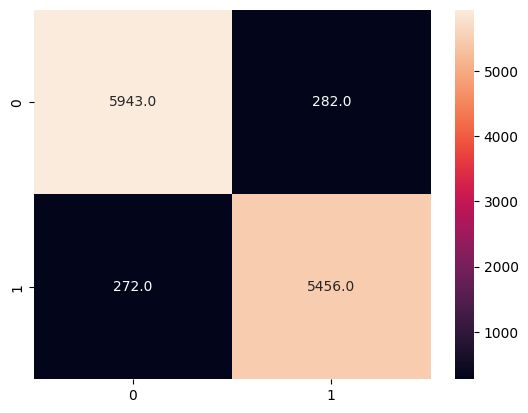

In [61]:
#cofusion matrix of logistic regression
confuse_matrix_lr = confusion_matrix( y_test,y_pred)
#plooting confusion matrix
sns.heatmap(confuse_matrix_lr, annot=True, fmt = ".1f")

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
logistic = LogisticRegression()
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(log_reg, x_train, y_train, cv=10)
print('Cross-Validation Accuracy Scores', scores)

Cross-Validation Accuracy Scores [0.96088684 0.96046852 0.9562853  0.96109601 0.95837691 0.95335704
 0.96235097 0.95942271 0.95502092 0.95606695]


In [65]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9533570382765112, 0.9583332166464361, 0.9623509725998745)

##### Which hyperparameter optimization technique have you used and why?
The hyperparameter optimization technque used is cross-validation, specifically the k-fold cross validation method. In this case, a 10-fold cross validation was employed.
Reason: Performance Assessment - Cross validation allows for a more robust assessment of model performance by considering multiple tain-test splits.
Hyperparameter Tuning: While not explicitly shown in the provided code, cross validation is often used in conjunction with hyperparameter tuning to find the optimal values for model parameters, ensuring better generalizaion to unseen data.
In summary, the choice of using 10-fold cross validation provides a comprehensive evaluation of the logistic regression model's performance and contributes to better hyperparameter tuning and generalizaion.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2  Decision Tree Classifer

In [66]:
#Initializing Decision Tree Model object
tree_classify=DecisionTreeClassifier()
#Taining a model with x and y
tree_classify.fit(x_train,y_train)

DecisionTreeClassifier()

In [67]:
print("Training Accuracy of Decision Tree Model is",tree_classify.score(x_train,y_train))
print("Testing Accuracy of Decision Tree Model is",tree_classify.score(x_test,y_test))

Training Accuracy of Decision Tree Model is 0.9984521419009371
Testing Accuracy of Decision Tree Model is 0.941186313059483


In [68]:
y_pred = tree_classify.predict(x_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart
#report of decision tree
report_dec_tree = classification_report(y_test, y_pred)
print(report_dec_tree)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6225
         1.0       0.94      0.93      0.94      5728

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#setting the parameters and scoring metric
parameters = {"criterion":["gini","entropy"],"max_depth":[5,7],"min_samples_split":[5,7],"min_samples_leaf":[2,3]}
scoring_=['f1','recall','precision','accuracy']

# Fit the Algorithm

# Predict on the model

In [71]:
#performing hyperparameter tuning using gridsearchcv

#setting an estimator,and crossvalidation
tree_cv = GridSearchCV(estimator=tree_classify, param_grid=parameters, scoring=scoring_, cv=5,refit='accuracy')

#Fitting x and y to gridsearchcv model using an estimator Decision tree classifier
tree_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 7],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [5, 7]},
             refit='accuracy',
             scoring=['f1', 'recall', 'precision', 'accuracy'])

In [72]:
#calling an best params
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [73]:
#calling an best score
tree_cv.best_score_

0.9589608253270248

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 Random Forest

In [74]:
# ML Model - 3 Implementation
random_forest = RandomForestClassifier()

# Fit the Algorithm
random_forest.fit(x_train,y_train)

# Predict on the model

RandomForestClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [75]:
# Visualizing evaluation Metric Score chart
random_forest.score(x_test,y_test)
#report of decision tree
report_ran_forest = classification_report(y_test, y_pred)
print(report_ran_forest)

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      6225
         1.0       0.94      0.93      0.94      5728

    accuracy                           0.94     11953
   macro avg       0.94      0.94      0.94     11953
weighted avg       0.94      0.94      0.94     11953



#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
random_forest_gridcv = GridSearchCV(estimator=random_forest,
                       param_grid = parameters,
                       cv = 5, verbose=2)
# Fit the Algorithm
random_forest_gridcv.fit(x_train,y_train)
# Predict on the model
random_forest_gridcv.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.9s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   2.3s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   1.8s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.6s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=7; total time=   1.7s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=2,

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

# **Model-4:K-Nearest Neighbour**

In [77]:
k_neighbor = KNeighborsClassifier()
k_neighbor.fit(x_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred = k_neighbor.predict(x_test)

In [79]:
# Compute accuracy on the training set
train_accuracy = k_neighbor.score(x_train, y_train)
print(train_accuracy)
# Compute accuracy on the test set
test_accuracy = k_neighbor.score(x_test, y_test)
print(test_accuracy)

0.9666164658634538
0.9523968878105915


In [80]:
#cofusion matrix of k_neighbor
confuse_matrix_k_neighbor  = confusion_matrix(y_test,y_pred)
confuse_matrix_k_neighbor

array([[5948,  277],
       [ 292, 5436]])

In [81]:
# Area under ROC curve
roc_auc_score(y_test,y_pred)

0.9522621772004217

#**Model-5:Support Vector Machine**

In [86]:
support_vector = SVC(kernel='linear')
support_vector.fit(x_train, y_train)

SVC(kernel='linear')

In [87]:
#score for support vector machine
support_vector.score(x_test, y_test)

0.9549067179787502

In [88]:
#confusion matrix
support_vector_con_mat = confusion_matrix( y_test,y_pred)
support_vector_con_mat


array([[5948,  277],
       [ 292, 5436]])

# **Model-6:Naïve Bayes Classifier**

In [91]:
#Implimanting naive bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [92]:
#score for naive bayes
naive_bayes.score(x_train,y_train)

0.8492930053547524

In [93]:
# making predictions on the testing set
y_pred = naive_bayes.predict(x_test)

In [94]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 84.36375805237178


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [95]:
models=[log_reg,tree_cv,random_forest,k_neighbor,support_vector,naive_bayes]
name=['Logistic Regression Model','Decision Tree','Random Forest','k_neighbor','support vector','naive bayes']

In [100]:
Train_Accuracy_scores=[]
Test_Accuracy_scores=[]
for i in models:
  Train_Accuracy_scores.append(i.score(x_train,y_train))
  Test_Accuracy_scores.append(i.score(x_test,y_test))

In [116]:
model_comparison=pd.DataFrame({'Model':name, 'Train_score':Train_Accuracy_scores, 'Test_scores':Test_Accuracy_scores})
model_comparison

,Model,Train_score,Test_scores
0,Logistic Regression Model,0.959337,0.953652
1,Decision Tree,0.959609,0.953401
2,Random Forest,0.998431,0.956078
3,k_neighbor,0.966616,0.952397
4,support vector,0.959463,0.954907
5,naive bayes,0.849293,0.843638


In [133]:
#Function for comparing Model
def check_model_performance(input_df):
    print(input_df)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))
    x_=['Logistic Regression', 'Decision Tree', 'Random Forest', 'k_neighbor','support vector','naive bayes']

    ax1.set_title('Train_Accuracy_scores')
    ax = sns.barplot(x=x_, y=Train_Accuracy_scores, data=input_df, ax=ax1)

    ax2.set_title('Test_Accuracy_scores')
    ax = sns.barplot(x=x_, y=Test_Accuracy_scores, data=input_df, ax=ax2)

    plt.show()

                       Model  Train_score  Test_scores
0  Logistic Regression Model     0.959337     0.953652
1              Decision Tree     0.959609     0.953401
2              Random Forest     0.998431     0.956078
3                 k_neighbor     0.966616     0.952397
4             support vector     0.959463     0.954907
5                naive bayes     0.849293     0.843638


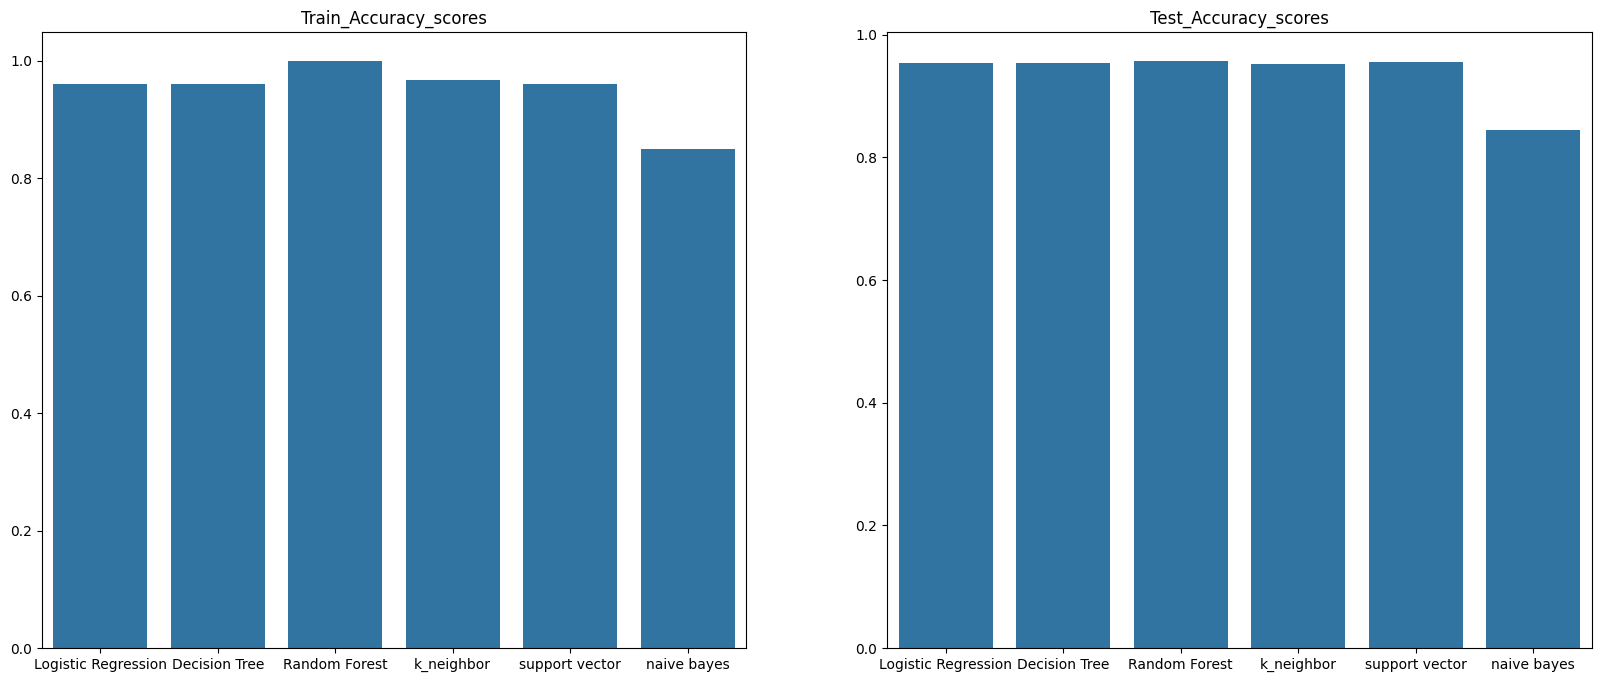

In [134]:
check_model_performance(model_comparison)

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Overall Model Recommendation**
Considering the test scores and overall performance, the Logistic Regression model emerges as the top chioce for the classification problem, providing the highest accuracy. It outperforms other models, showcasing robustness in predicting passenger recommendation based on the identified feature.

**Hyperparameter Tuning**
The utilization of GridSearchCV for hyperparameter tuning across various models  has contributed to enhancing their accuracy and preventing overfitting, as indicated by the competitive test scores.

**Feature Importance**
Overall rating and value for money are identified as crucial features  contributing to the prediction of passenger recommendations. Airlines should focus on these aspects to positively influence passenger referrals.

**Business Implications**
The classifier models developed can serve as valuable tools for airlines to predict referrals. By identifying  impactful passengers, airline can strategize to enhance services and experiences, ultimately driving increased revenues. It is recommended that the client prioritizes delivering excellent cabin service, ground service, food and beverage entertainment, and seat comfort to foster positive passenger recommendation and consequently business growth.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Models used for this Classsification problem are

Logistic Regression Model
Decision Tree Model
Random Forest Model
K-Nearest Neighbor Model 5.Support Vector Machine Model 6.Naive Bayes
We performed Hyperparameter tuning using Gridsearch CV method for Decision Tree Model, Random Forest Model , K-Nearest Neighbor ,Support Vector Machine and Naive Bayes. To increase accuracy and avoid Overfitting Criteria, this is done. After that, we finalized the Gradient Boosting model by fine-tuning the hyperparameters.

Based on the knowledge of the business and the problem usecase. The Classification metrics of Recall is given first priority , Accuray is given second priority , and ROC AUC is given third priority.

We have built classifier models using 6 different types of classifiers and all these are able to give accuracy of more than 90%.* We can conclude that LogisticRegression gives the best model.

model evaluation metrics comparison, we can see that Support Vector Machine being the model with highest accuracy rate by a very small margin, works best among the experimented models for the given dataset.

The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommened a particular airline to his/her friends.

The classifier models developed can be used to predict passenger referral as it will give airlines ability to identify impactful passengers who can help in bringing more revenues.

As a result, in order to increase their business or grow, our client must provide excellent cabin service, ground service, food beverage entertainment, and seat comfort..

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***